# Machine Learning Prediction Models Part 2
---

In this notebook, we aim to find the best model for our movie dataset in determining the Oscar winner from a human perspective (by studying the accuracy parameters).

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  
> Scikit-learn :  Machine Learning Library

In [1]:
import numpy as np
import pandas as pd
#-----------classifiers------------------------
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#----------------------------------------------
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

#### Function to calculate accuracy parameters:

In [2]:
#Function to calculate Accuracy Parameters (TPR,TNR,FPR,FNR)
def get_rate(conArray):
    con = conArray.ravel()
    TN = con[0]
    FP = con[1]
    FN = con[2]
    TP = con[3]
    TNR = TN/(TN+FP)
    FNR = FN/(FN+TP)
    TPR = TP/(TP+FN)
    FPR = FP/(TN+FP)
    print("True negative rate: ", TNR.round(2))
    print("False negative rate: ", FNR.round(2))
    print("True positive rate: ", TPR.round(2))
    print("False positive rate: ", FPR.round(2))

### Import the dataset

In [3]:
df = pd.read_csv('movie_dataset_final.csv')

In [4]:
#for all missing values, fill in 0
df['Metascore'] = df['Metascore'].fillna(0)

#### Extracting Features and Predictors

In [51]:
#prepare your ingredients
X = ['Runtime (min)', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
     'Drama', 'Family','Fantasy', 'History', 'Horror', 'Musical', 'Mystery', 'Romance', 
     'Sci-Fi', 'Sport','Thriller', 'War', 'Western','Budget','Domestic (US) gross',
     'International gross','Worldwide gross','Metascore', 'IMDb_rating', 'IMDb_votes', 'RT_rating', 'RT_review',
     'GG_drama_winner', 'GG_drama_nominee', 'GG_comedy_winner', 'GG_comedy_nominee',
     'BAFTA_winner', 'BAFTA_nominee', 'DGA_winner', 'DGA_nominee',
     'PGA_winner', 'PGA_nominee', 'CCMA_winner', 'CCMA_nominee',
     'Golden_Palm_winner', 'Golden_Palm_nominee', 'Golden_Bear_winner', 'Golden_Bear_nominee',
     'Golden_Lion_winner', 'Golden_Lion_nominee', 'PCA_winner', 'PCA_nominee',
     'NYFCC_winner', 'NYFCC_nominee', 'OFCS_winner', 'OFCS_nominee']

#prep the x variables and y variables
X_set = df[X]
y_set = df['Oscar_winner']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size = 0.25)

## Prediction Models
To predict the winners of **Academy Awards for Best Picture**, we will be using the following models and from the models, select the one with highest accuracy to predict the winners for the prestigious award.

We have 10 models:
1. Multinomial Naive Bayes
2. Gausian Naive Bayes
3. Bernoulli Naive Bayes
4. Decision Tree
5. Support Vector Classifier
6. Random Forest
7. Logistic Regression
8. AdaBoost with MultinomialNB as base estimator
9. AdaBoost with Decision Tree as base estimator
10. AdaBoost with SVC as base estimator

---
### 1. Naive Bayes: MultinomialNB Classifier

In [6]:
multiNom = MultinomialNB()
MNB_xTrain = X_train
MNB_xTest = X_test
MNB_yTrain = y_train
MNB_yTest = y_test
multiNom.fit(MNB_xTrain, MNB_yTrain) #Train the model with train set

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [7]:
MNBy_trainPred = multiNom.predict(MNB_xTrain)
MNBy_testPred = multiNom.predict(MNB_xTest)

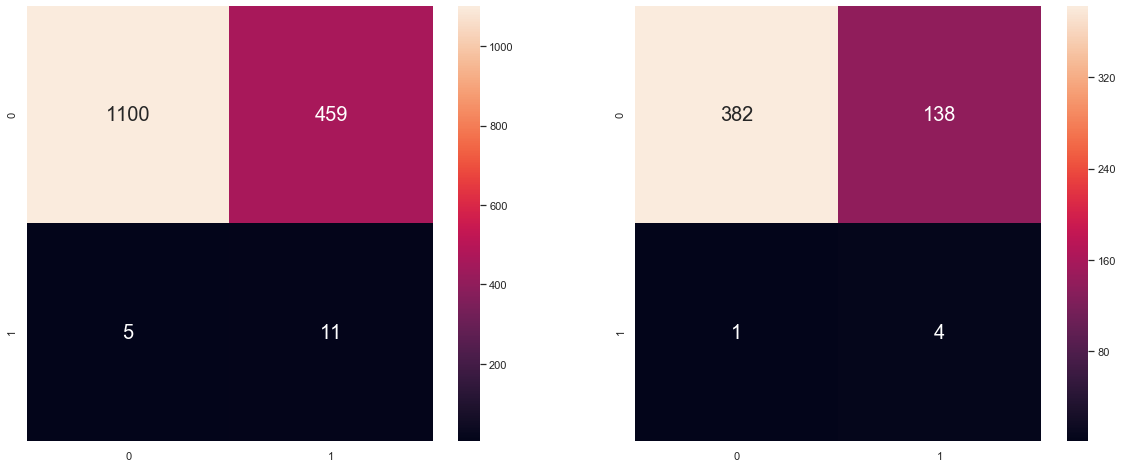

In [8]:
#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(MNB_yTrain, MNBy_trainPred), annot = True, annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(MNB_yTest, MNBy_testPred), annot = True, annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

In [9]:
print("Classification accuracy for train set: ", multiNom.score(MNB_xTrain, MNB_yTrain).round(3))
print("Classification accuracy for test set: ", multiNom.score(MNB_xTest, MNB_yTest).round(3))
print()
print("For train set:")
get_rate(confusion_matrix(MNB_yTrain, MNBy_trainPred))
print()
print("For test set:")
get_rate(confusion_matrix(MNB_yTest, MNBy_testPred))

Classification accuracy for train set:  0.705
Classification accuracy for test set:  0.735

For train set:
True negative rate:  0.71
False negative rate:  0.31
True positive rate:  0.69
False positive rate:  0.29

For test set:
True negative rate:  0.73
False negative rate:  0.2
True positive rate:  0.8
False positive rate:  0.27


The Multinomial Naive model does not seem to be a suitable classification model for predicting Oscar Best Picture for a few reasons.
Firstly, the classification accuracy is pretty low, especially for the test set. 
Secondly, the false positive rate is very high, meaning that a lot of movies that were not winners or even nominees were classified as winners.  

---

### 2. Naive Bayes: GausianNB Classifier

In [10]:
#create classifier object
gausian = GaussianNB()
G_xTrain = X_train
G_xTest = X_test
G_yTrain = y_train
G_yTest = y_test
#fit data
gausian.fit(G_xTrain, G_yTrain) 

#predict response
Gy_trainPred = gausian.predict(G_xTrain)
Gy_testPred = gausian.predict(G_xTest)

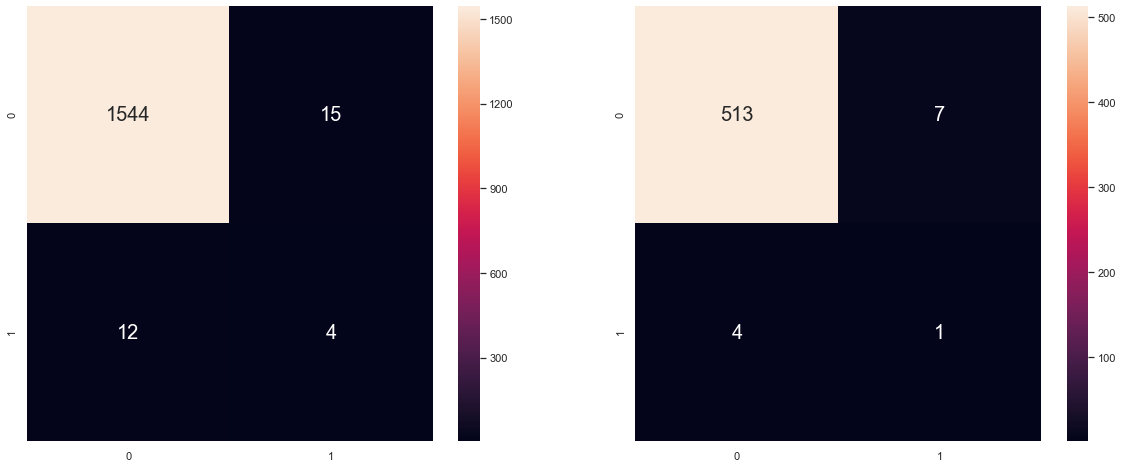

In [11]:
#visualise result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(G_yTrain, Gy_trainPred), annot = True, annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(G_yTest, Gy_testPred), annot = True, annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

In [12]:
print("Classification accuracy for train set: ", gausian.score(G_xTrain, G_yTrain).round(3))
print("Classification accuracy for test set: ", gausian.score(G_xTest, G_yTest).round(3))
print()
print("For train set:")
get_rate(confusion_matrix(G_yTrain, Gy_trainPred))
print()
print("For test set:")
get_rate(confusion_matrix(G_yTest, Gy_testPred))

Classification accuracy for train set:  0.983
Classification accuracy for test set:  0.979

For train set:
True negative rate:  0.99
False negative rate:  0.75
True positive rate:  0.25
False positive rate:  0.01

For test set:
True negative rate:  0.99
False negative rate:  0.8
True positive rate:  0.2
False positive rate:  0.01


Although the classification accuracy is very high for both the train and test set, these accuracies appear to be contributed mainly by the correct classification of most movies that did not win Oscar Best Picture. 
However, notice that our **true positive rate** is very **low** / **false negative rate** is especially **high**, meaning that many of the movies that actually won Oscar Best Picture were classified as 'losers'. Hence, despite the high classification accuracy, the Gausian Naive Bayes model is also not a suitable classification model. 

---

### 3. Naive Bayes: Bernoulli NB Classifier

In [13]:
#create classifier object
bernoulli = BernoulliNB()
B_xTrain = X_train
B_xTest = X_test
B_yTrain = y_train
B_yTest = y_test
#fit data
bernoulli.fit(B_xTrain, B_yTrain) 

#predict response
By_trainPred = bernoulli.predict(B_xTrain)
By_testPred = bernoulli.predict(B_xTest)

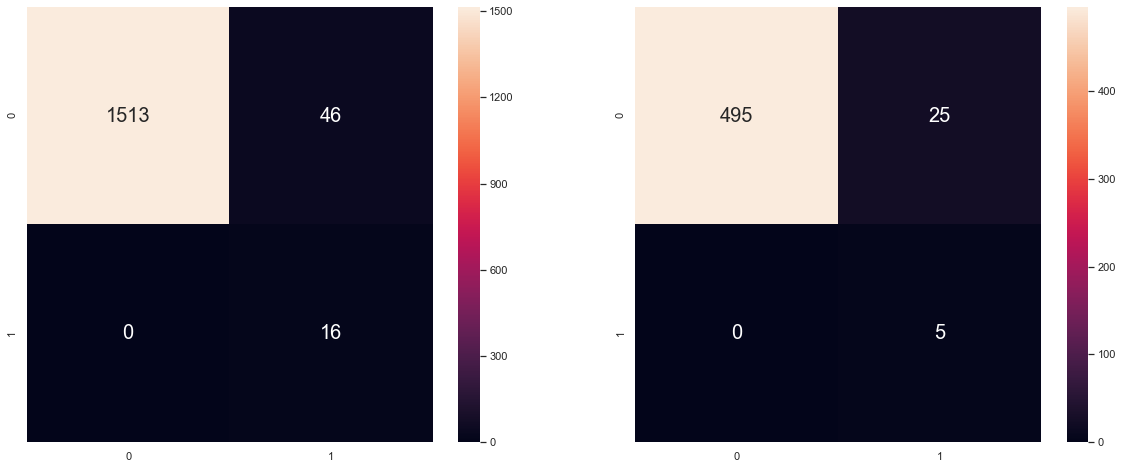

In [14]:
#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(B_yTrain, By_trainPred), annot = True, annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(B_yTest, By_testPred), annot = True, annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

In [15]:
print("Classification accuracy for train set: ", bernoulli.score(B_xTrain, B_yTrain).round(3))
print("Classification accuracy for test set: ", bernoulli.score(B_xTest, B_yTest).round(3))
print()
print("For train set:")
get_rate(confusion_matrix(B_yTrain, By_trainPred))
print()
print("For test set:")
get_rate(confusion_matrix(B_yTest, By_testPred))

Classification accuracy for train set:  0.971
Classification accuracy for test set:  0.952

For train set:
True negative rate:  0.97
False negative rate:  0.0
True positive rate:  1.0
False positive rate:  0.03

For test set:
True negative rate:  0.95
False negative rate:  0.0
True positive rate:  1.0
False positive rate:  0.05


Similar to the Gausian Naive Bayes model, the Bernoulli Naive Bayes model's classification accuracy is also very high. Furthermore, the true positive rate for both the train and test set are 1.0, which means all the movies that won the Oscar Best Picture are classified correctly. Therefore, at first glance, it would look like a suitable model too. However, there is a slight flaw with it.

According to the confusion matrix, there is a significant number of movies that were falsely labelled as 'winners' **despite not having won the Oscar Best Picture**. This is troubling because if one were to use this model to predict if a future movie  would win Oscar Best Picture, there is a higher probability of that movie being predicted as a winner and ending up **not** winning the prize than actually winning it. 

Hence, the Bernoulli Naive Bayes model is not a suitable model as well.

---

### 4. Decision Tree Classifier

In [16]:
DT = DecisionTreeClassifier(max_depth = 8)
DT_xTrain = X_train
DT_xTest = X_test
DT_yTrain = y_train
DT_yTest = y_test

#fit data
DT.fit(DT_xTrain, DT_yTrain)

#predict response
yDT_trainPred = DT.predict(DT_xTrain)
yDT_testPred = DT.predict(DT_xTest)

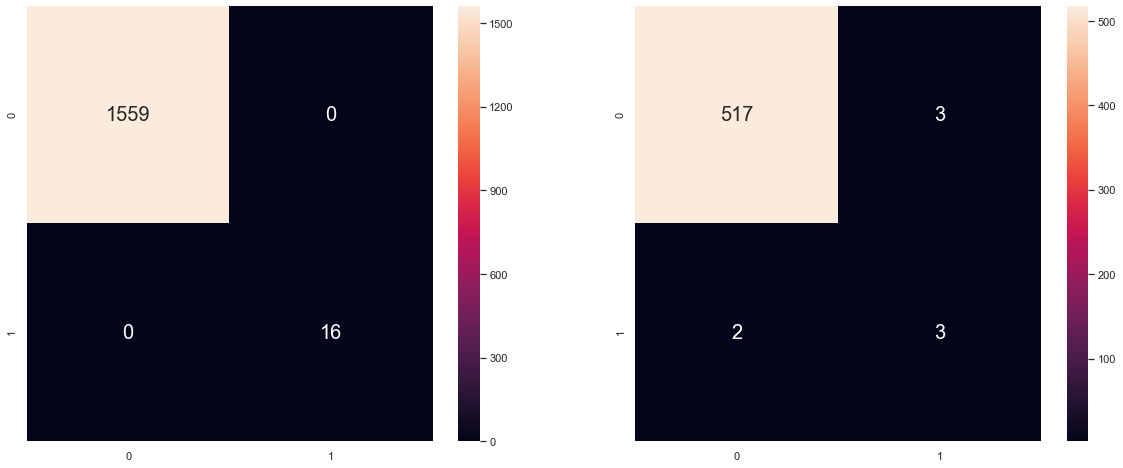

In [17]:
#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(DT_yTrain, yDT_trainPred), annot = True, annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(DT_yTest, yDT_testPred), annot = True, annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

In [18]:
print("Classification accuracy for train set: ", DT.score(DT_xTrain, DT_yTrain).round(3))
print("Classification accuracy for test set: ", DT.score(DT_xTest, DT_yTest).round(3))
print()
print("For train set:")
get_rate(confusion_matrix(DT_yTrain, yDT_trainPred))
print()
print("For test set:")
get_rate(confusion_matrix(DT_yTest, yDT_testPred))

Classification accuracy for train set:  1.0
Classification accuracy for test set:  0.99

For train set:
True negative rate:  1.0
False negative rate:  0.0
True positive rate:  1.0
False positive rate:  0.0

For test set:
True negative rate:  0.99
False negative rate:  0.4
True positive rate:  0.6
False positive rate:  0.01


On the whole, the Decision Tree Classifier (DTC) has outperformed the Naive Bayes models by a few reasons.

Firstly, relative to the MultinomialNB and GausianNB classifiers, DTC has produced the highest true positive and true negative rate for the test set. 

Secondly, relative to BernoulliNB model, **on average** the false positive rate in the DTC is much lower and the true positive rate is higher. This means that this model has a higher probability of correctly predicting the movie which will actually win the Oscar Best Picture.

---

### 5. Support Vector Classifier

In [47]:
#prepare your ingredients

var_SVC = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
           'Drama', 'Family','Fantasy', 'History', 'Horror', 'Musical', 'Mystery',
           'Romance', 'Sci-Fi', 'Sport','Thriller', 'War', 'Western','BAFTA_winner', 'BAFTA_nominee',
           'DGA_winner', 'DGA_nominee', 'GG_comedy_winner', 
           'GG_comedy_nominee', 'GG_drama_winner', 'GG_drama_nominee', 'PGA_winner', 
           'PGA_nominee', 'CCMA_winner', 'CCMA_nominee', "Golden_Palm_winner", "Golden_Palm_nominee",
           'Golden_Bear_winner', 'Golden_Bear_nominee', 'Golden_Lion_winner', 'Golden_Lion_nominee',
           'PCA_winner', 'PCA_nominee', 'NYFCC_winner', 'NYFCC_nominee', 'OFCS_winner', 'OFCS_nominee']

#prep the x variables and y variables
x_SVC = df[var_SVC]
y_SVC = df['Oscar_winner']

#split the dataset
x_SVCtrain, x_SVCtest, y_SVCtrain, y_SVCtest = train_test_split(x_SVC, y_SVC, test_size = 0.25)

In [48]:
#create object
svc = SVC(kernel='linear')

#fit data
svc.fit(x_SVCtrain, y_SVCtrain)

#predict response
y_SVCtrainPred = svc.predict(x_SVCtrain)
y_SVCtestPred = svc.predict(x_SVCtest)

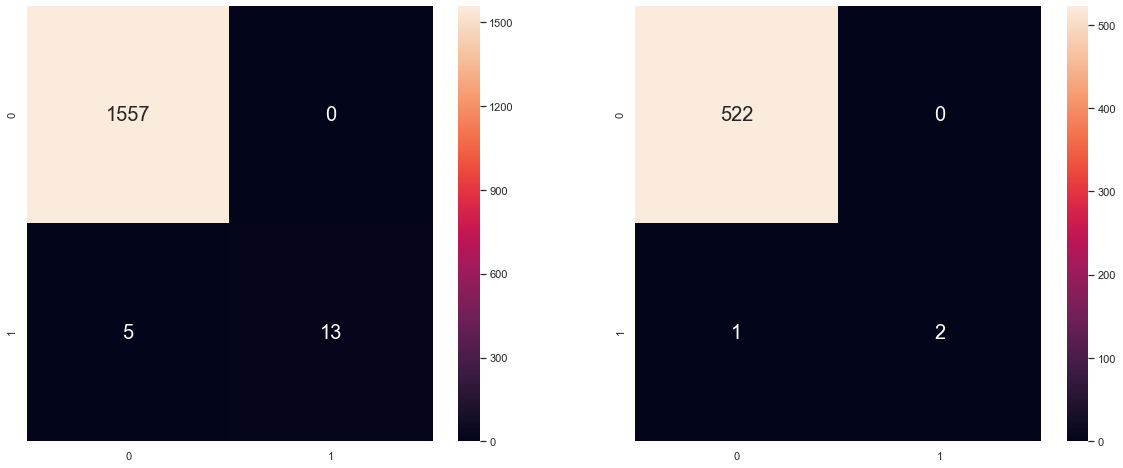

In [49]:
#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_SVCtrain, y_SVCtrainPred), annot = True, annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_SVCtest, y_SVCtestPred), annot = True, annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

In [22]:
print("Classification accuracy for train set: ", svc.score(x_SVCtrain, y_SVCtrain).round(3))
print("Classification accuracy for test set: ", svc.score(x_SVCtest, y_SVCtest).round(3))
print()
print("For train set:")
get_rate(confusion_matrix(y_SVCtrain, y_SVCtrainPred))
print()
print("For test set:")
get_rate(confusion_matrix(y_SVCtest, y_SVCtestPred))

Classification accuracy for train set:  0.999
Classification accuracy for test set:  0.99

For train set:
True negative rate:  1.0
False negative rate:  0.07
True positive rate:  0.93
False positive rate:  0.0

For test set:
True negative rate:  1.0
False negative rate:  0.71
True positive rate:  0.29
False positive rate:  0.0


For Support Vector Classifier, it took too long for the model to train if we included features like 'year', 'imdb_rating', 'metascore', 'imdb_votes', 'Rotten Tomatoes rating', 'budget', 'domestic gross', 'worldwide gross'. These variables were all non-binary. 

Hence, we had to create a new set of variable which were only binary data. With regards to the confusion matrix on the right which is for the test set, it has decently predicted 2 out of 3 Oscar winners in the test set with 0 false positive. Hence, it is also a great model to consider. 

---
### 6. Random Forest Classifier

In [23]:
RF = RandomForestClassifier(n_estimators = 100,
                                    max_depth = 4)
RF_xTrain = X_train
RF_xTest = X_test
RF_yTrain = y_train
RF_yTest = y_test

#fit data
RF.fit(RF_xTrain, RF_yTrain)

#predict response
RFy_trainPred = RF.predict(RF_xTrain)
RFy_testPred = RF.predict(RF_xTest)

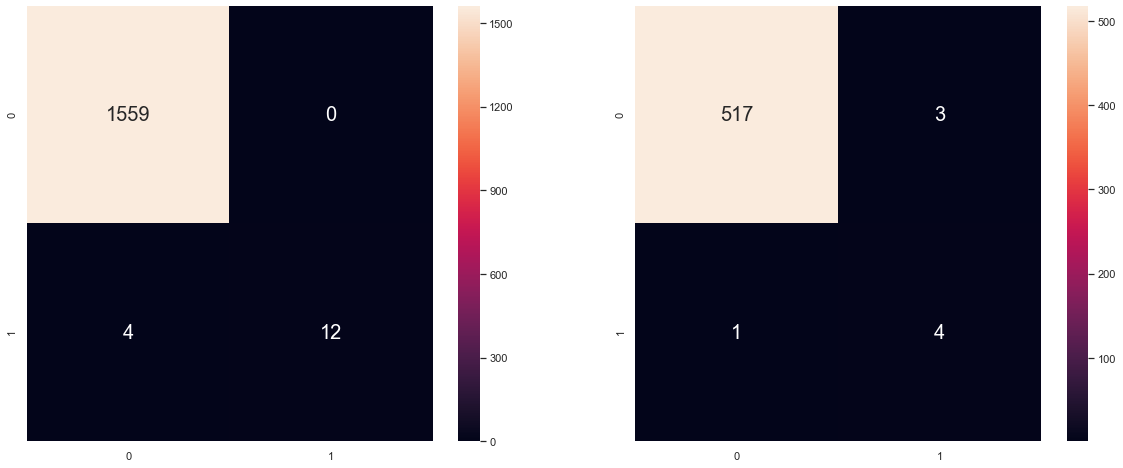

In [24]:
#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(RF_yTrain, RFy_trainPred), annot = True, annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(RF_yTest, RFy_testPred), annot = True, annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

In [25]:
print("Classification accuracy for train set: ", RF.score(RF_xTrain, RF_yTrain).round(3))
print("Classification accuracy for test set: ", RF.score(RF_xTest, RF_yTest).round(3))
print()
print("For train set:")
get_rate(confusion_matrix(RF_yTrain, RFy_trainPred))
print()
print("For test set:")
get_rate(confusion_matrix(RF_yTest, RFy_testPred))

Classification accuracy for train set:  0.997
Classification accuracy for test set:  0.992

For train set:
True negative rate:  1.0
False negative rate:  0.25
True positive rate:  0.75
False positive rate:  0.0

For test set:
True negative rate:  0.99
False negative rate:  0.2
True positive rate:  0.8
False positive rate:  0.01


Random Forest is an ensemble model worth considering because it reduces variance and it is the aggregation of predictions of multiple decision trees. Hence, it will contain more reliable and less bias predictions than individual trees. It also generated a really high true positive rate and low false positive rate. Hence, it is very reliable. However, let's see how it will compare to an AdaBoost model which is also from the ensemble library. 

---
### 7. Logistic Regression

In [43]:
#create object
logic = LogisticRegression()
LR_xTrain = X_train
LR_xTest = X_test
LR_yTrain = y_train
LR_yTest = y_test

#fit data
logic.fit(LR_xTrain, LR_yTrain)

#predict response
LRy_trainPred = logic.predict(LR_xTrain)
LRy_testPred = logic.predict(LR_xTest)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


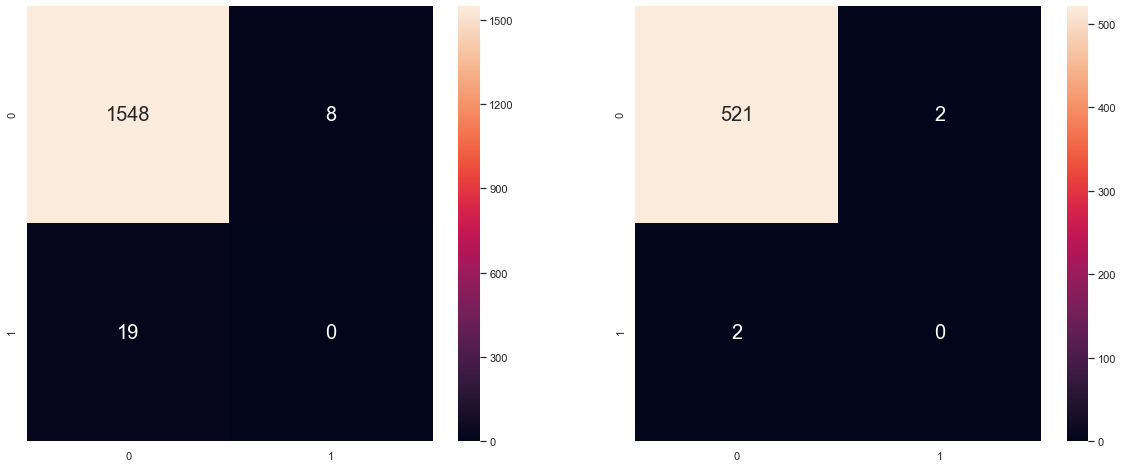

In [44]:
#visualise data
f,axes = plt.subplots(1,2, figsize=(20,8))
sb.heatmap(confusion_matrix(LR_yTrain, LRy_trainPred), annot=True, annot_kws={"size":20}, ax = axes[0], fmt = '.0f')
sb.heatmap(confusion_matrix(LR_yTest, LRy_testPred),annot=True, annot_kws={"size":20}, ax = axes[1], fmt='.0f')

In [28]:
print("Classification accuracy for train set: ", logic.score(LR_xTrain, LR_yTrain).round(3))
print("Classification accuracy for test set: ", logic.score(LR_xTest, LR_yTest).round(3))
print()
print("For train set:")
get_rate(confusion_matrix(LR_yTrain, LRy_trainPred))
print()
print("For test set:")
get_rate(confusion_matrix(LR_yTest, LRy_testPred))

Classification accuracy for train set:  0.989
Classification accuracy for test set:  0.987

For train set:
True negative rate:  1.0
False negative rate:  1.0
True positive rate:  0.0
False positive rate:  0.0

For test set:
True negative rate:  1.0
False negative rate:  1.0
True positive rate:  0.0
False positive rate:  0.0


Logistic Regression (LR), on most occassions, produce 0 true positive and therefore, is unsuitable for our project.

---
### 8. AdaBoost with MultinomialNB as the base estimator

In [45]:
#create object
abc_mNB = AdaBoostClassifier(n_estimators = 100,
                             base_estimator = multiNom,
                            learning_rate = 1)

#fit data
abc_mNB.fit(X_train, y_train)

#predict responses
y_trainPred = abc_mNB.predict(X_train)
y_testPred = abc_mNB.predict(X_test)

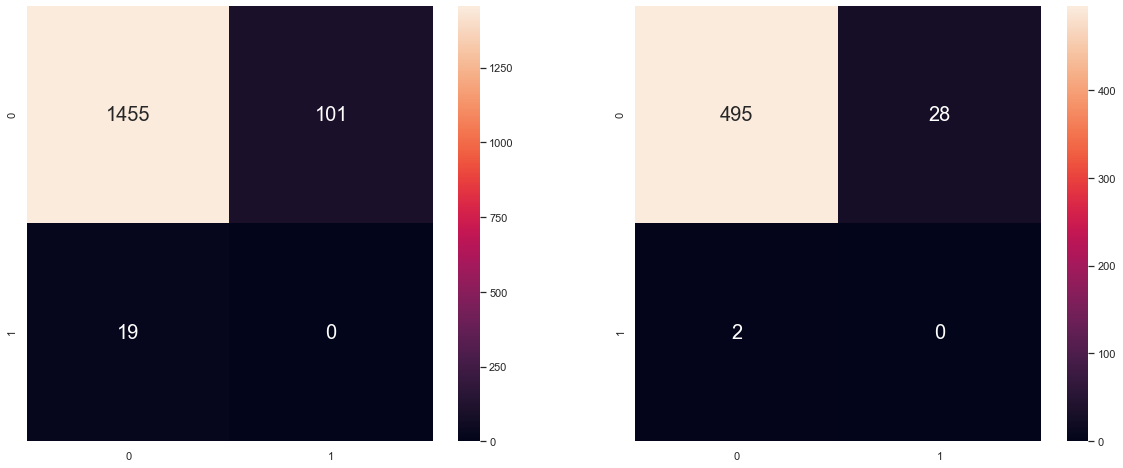

In [46]:
#visualise data
f,axes = plt.subplots(1,2, figsize=(20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred), annot=True, annot_kws={"size":20}, ax = axes[0], fmt = '.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred),annot=True, annot_kws={"size":20}, ax = axes[1], fmt='.0f')

In [31]:
print("Classification accuracy for train set: ", abc_mNB.score(X_train, y_train).round(3))
print("Classification accuracy for test set: ", abc_mNB.score(X_test, y_test).round(3))
print()
print("For train set:")
get_rate(confusion_matrix(y_train, y_trainPred))
print()
print("For test set:")
get_rate(confusion_matrix(y_test, y_testPred))

Classification accuracy for train set:  0.343
Classification accuracy for test set:  0.333

For train set:
True negative rate:  0.34
False negative rate:  0.06
True positive rate:  0.94
False positive rate:  0.66

For test set:
True negative rate:  0.33
False negative rate:  0.0
True positive rate:  1.0
False positive rate:  0.67


Despite the significant jump in classification accuracy, AdaBoost model with MultinomialNB as base estimator still produces an extremely low true positive rate with higher proportion of false positive relative to the true positive. 

This goes to show that AdaBoost can immensely improve the accuracy of classification models. Let's try it out with the DTC and SVC next. 

---
### 9. AdaBoost with Decision Tree as base estimator

In [32]:
#create object
abc_DT = AdaBoostClassifier(n_estimators = 100,
                             base_estimator = DT,
                            learning_rate = 1)

#fit data
abc_DT.fit(X_train, y_train)

#predict responses
yABC_DTtrainPred = abc_DT.predict(X_train)
yABC_DTtestPred = abc_DT.predict(X_test)

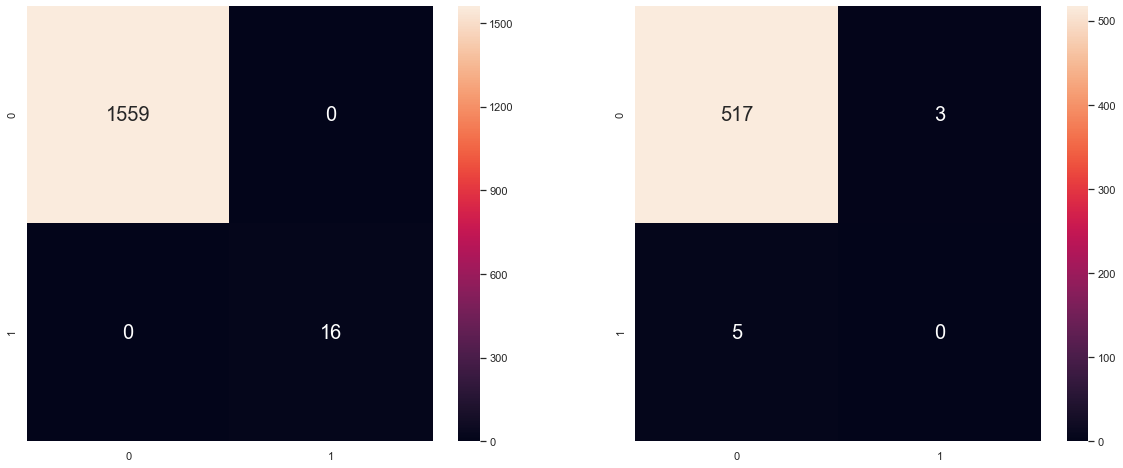

In [33]:
#visualise data
f,axes = plt.subplots(1,2, figsize=(20,8))
sb.heatmap(confusion_matrix(y_train, yABC_DTtrainPred), annot=True, annot_kws={"size":20}, ax = axes[0], fmt = '.0f')
sb.heatmap(confusion_matrix(y_test, yABC_DTtestPred),annot=True, annot_kws={"size":20}, ax = axes[1], fmt='.0f')

In [34]:
print("Classification accuracy for train set: ", abc_DT.score(X_train, y_train).round(3))
print("Classification accuracy for test set: ", abc_DT.score(X_test, y_test).round(3))
print()
print("For train set:")
get_rate(confusion_matrix(y_train, yABC_DTtrainPred))
print()
print("For test set:")
get_rate(confusion_matrix(y_test, yABC_DTtestPred))

Classification accuracy for train set:  1.0
Classification accuracy for test set:  0.985

For train set:
True negative rate:  1.0
False negative rate:  0.0
True positive rate:  1.0
False positive rate:  0.0

For test set:
True negative rate:  0.99
False negative rate:  1.0
True positive rate:  0.0
False positive rate:  0.01


	Train set:								Test set:


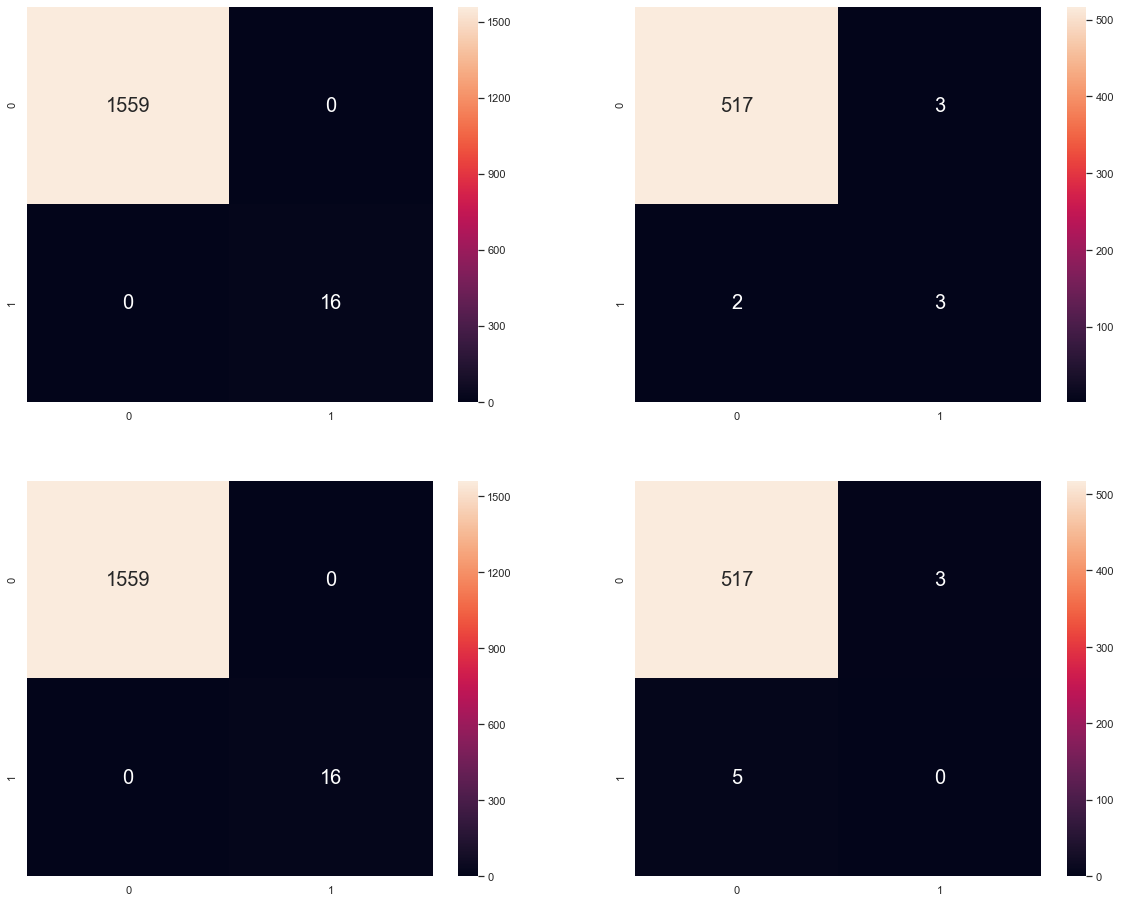

In [35]:
#Comparing DTC vs AdaBoost(DTC)
print("\tTrain set:\t\t\t\t\t\t\t\tTest set:")
f,axes = plt.subplots(2,2,figsize = (20,16))
sb.heatmap(confusion_matrix(y_train, yDT_trainPred), annot = True, annot_kws={"size":20}, ax = axes[0,0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, yDT_testPred), annot = True, annot_kws={"size":20}, ax = axes[0,1], fmt = '.0f')
sb.heatmap(confusion_matrix(y_train, yABC_DTtrainPred), annot=True, annot_kws={"size":20}, ax = axes[1,0], fmt = '.0f')
sb.heatmap(confusion_matrix(y_test, yABC_DTtestPred),annot=True, annot_kws={"size":20}, ax = axes[1,1], fmt='.0f')

AdaBoost with DTC as base estimator performed worse than the DTC alone. It seems like it is not going to be reliable for our predictions. 

---
### 10. AdaBoost with Support Vector Classifier as the base estimator

In [52]:
#create object
abc_svc = AdaBoostClassifier(n_estimators = 100,
                             base_estimator = svc,
                             learning_rate = 1,
                            algorithm = 'SAMME')

In [53]:
#fit data
abc_svc.fit(x_SVCtrain, y_SVCtrain)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma='auto_deprecated',
                                      kernel='linear', max_iter=-1,
                                      probability=False, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1, n_estimators=100, random_state=None)

In [54]:
#predict responses
yABC_SVCtrainPred = abc_svc.predict(x_SVCtrain)
yABC_SVCtestPred = abc_svc.predict(x_SVCtest)

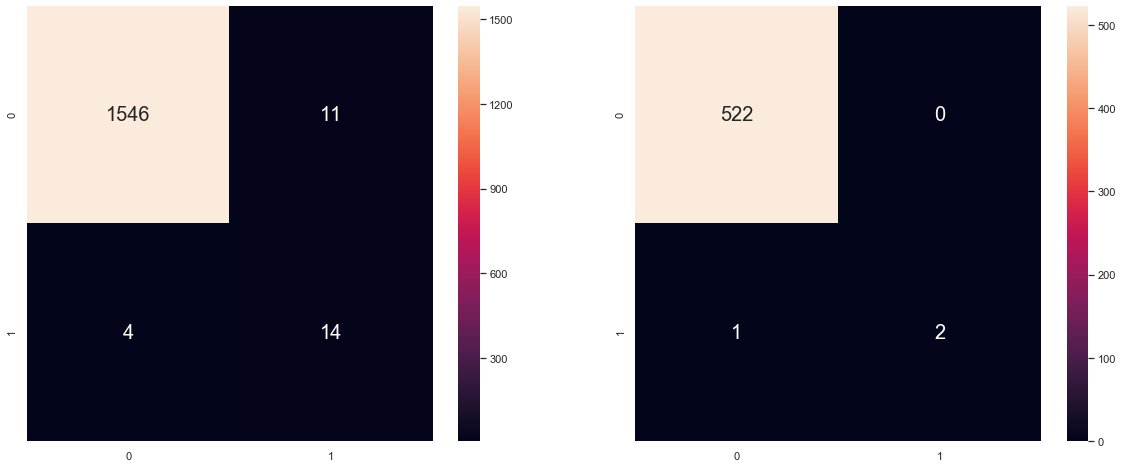

In [55]:
#visualise data
f,axes = plt.subplots(1,2, figsize=(20,8))
sb.heatmap(confusion_matrix(y_SVCtrain, yABC_SVCtrainPred), annot=True, annot_kws={"size":20}, ax = axes[0], fmt = '.0f')
sb.heatmap(confusion_matrix(y_SVCtest, yABC_SVCtestPred),annot=True, annot_kws={"size":20}, ax = axes[1], fmt='.0f')

In [56]:
print("Classification accuracy for train set: ", abc_svc.score(x_SVCtrain, y_SVCtrain).round(3))
print("Classification accuracy for test set: ", abc_svc.score(x_SVCtest, y_SVCtest).round(3))
print()
print("For train set:")
get_rate(confusion_matrix(y_SVCtrain, yABC_SVCtrainPred))
print()
print("For test set:")
get_rate(confusion_matrix(y_SVCtest, yABC_SVCtestPred))

Classification accuracy for train set:  0.99
Classification accuracy for test set:  0.998

For train set:
True negative rate:  0.99
False negative rate:  0.22
True positive rate:  0.78
False positive rate:  0.01

For test set:
True negative rate:  1.0
False negative rate:  0.33
True positive rate:  0.67
False positive rate:  0.0


	Train set:								Test set:


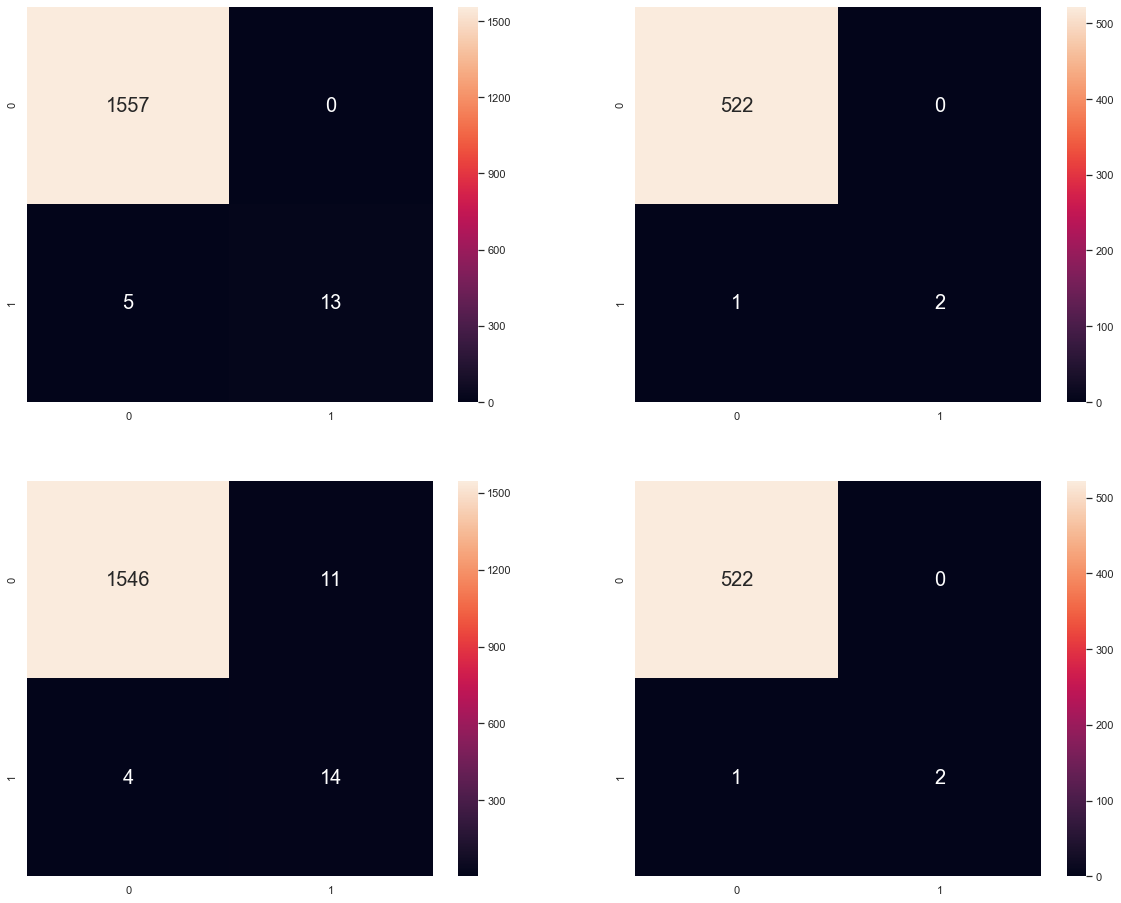

In [57]:
#Comparing SVC vs AdaBoost(SVC)
print("\tTrain set:\t\t\t\t\t\t\t\tTest set:")
f,axes = plt.subplots(2,2,figsize = (20,16))
sb.heatmap(confusion_matrix(y_SVCtrain, y_SVCtrainPred), annot = True, annot_kws={"size":20}, ax = axes[0,0], fmt='.0f')
sb.heatmap(confusion_matrix(y_SVCtest, y_SVCtestPred), annot = True, annot_kws={"size":20}, ax = axes[0,1], fmt = '.0f')
sb.heatmap(confusion_matrix(y_SVCtrain, yABC_SVCtrainPred), annot=True, annot_kws={"size":20}, ax = axes[1,0], fmt = '.0f')
sb.heatmap(confusion_matrix(y_SVCtest, yABC_SVCtestPred),annot=True, annot_kws={"size":20}, ax = axes[1,1], fmt='.0f')

Using AdaBoost with the base estimator as SVC did not result in any difference from SVC alone. 

---

## Conclusion: 

According to articles online, both the RF and AdaBoost (AB) are used to increase the accuracy of base classifiers (DTC and SVC etc.) So the dilemma is the choice between these 2 ensemble models. 

RF uses a certain number of full-sized trees while AB uses stumps which are decision trees with only one split. In RF, each tree has equal amount of say in the final decision for classification but in AB, the stump which makes less error has more say. While this may seem to imply that AB could be a better model (since there is a higher probability of it producing higher accuracy), the next difference indicates otherwise. 

RF reduces variance and the chances of overfitting are rare, while AB reduces bias and has a slightly higher chance of overfitting. This could be due to the fact that AB is sensitive to noise data. It is highly sensitive to outliers as it tries to fit each point perfectly. 

Lastly, AB with base estimator as SVC can only use binary data, which means it cannot train using features like worldwide gross, ratings and budgets. Hence, it seems a bit 'handicapped' compared to Random Forest. 

All in all, the choice of a model which reduces variance and has the lowest chance of overfitting is most preferable as the data in the real world is never the same as the data used to train the model. Hence, we need a model that can generally handle any data given to it. Thus, the Random Forest is the best option.